# Player Game Stats Exploratory Data Analysis

## Importing and Describing Data

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

df = pd.read_csv('player_game_stats_data_2022_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241106 entries, 0 to 241105
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       241106 non-null  int64 
 1   school        241106 non-null  object
 2   conference    241106 non-null  object
 3   homeAway      241106 non-null  object
 4   points        241106 non-null  int64 
 5   category      241106 non-null  object
 6   sub_category  241106 non-null  object
 7   athlete_id    241106 non-null  int64 
 8   athlete_name  241106 non-null  object
 9   stat          241106 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.4+ MB


## Creating Dataframes for Individual Categories

The purpose of this section is to create dataframes for each individual category within the player_game_stats dataset

In [38]:
df['category'].unique()

array(['punting', 'kicking', 'puntReturns', 'kickReturns',
       'interceptions', 'defensive', 'receiving', 'rushing', 'passing',
       'fumbles'], dtype=object)

In [39]:
# Creating individual dataframes for each category

punting_df = df[df['category'] == 'punting']
kicking_df = df[df['category'] == 'kicking']
puntReturns_df = df[df['category'] == 'puntReturns']
interceptions_df = df[df['category'] == 'interceptions']
defensive_df = df[df['category'] == 'defensive']
receiving_df = df[df['category'] == 'receiving']
rushing_df = df[df['category'] == 'rushing']
passing_df = df[df['category'] == 'passing']
fumbles_df = df[df['category'] == 'fumbles']

# Exploring Passing Data

In [44]:
passing_df.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
100,401442019,Tennessee,SEC,away,31,passing,INT,4360698,Joe Milton,0
101,401442019,Tennessee,SEC,away,31,passing,TD,4360698,Joe Milton,3
102,401442019,Tennessee,SEC,away,31,passing,AVG,4360698,Joe Milton,9.0
103,401442019,Tennessee,SEC,away,31,passing,YDS,4360698,Joe Milton,251
104,401442019,Tennessee,SEC,away,31,passing,C/ATT,4360698,Joe Milton,19/28


In [45]:
passing_df['sub_category'].unique()

array(['INT', 'TD', 'AVG', 'YDS', 'C/ATT', 'QBR'], dtype=object)

## Exploring Passing Yards Data

In [46]:
pass_yards = passing_df[passing_df['sub_category'] == 'YDS']
pass_yards.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
103,401442019,Tennessee,SEC,away,31,passing,YDS,4360698,Joe Milton,251
223,401442019,Clemson,ACC,home,14,passing,YDS,4426553,Davis Allen,0
224,401442019,Clemson,ACC,home,14,passing,YDS,-5650,Team,0
225,401442019,Clemson,ACC,home,14,passing,YDS,4685413,Cade Klubnik,320
395,401443542,Pittsburgh,ACC,away,37,passing,YDS,-7111,Team,0


In [47]:
# Converting stat to int
pass_yards['stat'] = pass_yards['stat'].astype(int)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_60859/3247102004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_yards['stat'] = pass_yards['stat'].astype(int)


In [48]:
# Top 20 QBs by avg YPG
pass_yards.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(20)

,,points,stat
athlete_name,school,,
Kyle Vantrease,Georgia Southern,45.000000,409.000000
Chase Cunningham,Middle Tennessee,45.000000,408.000000
Tanner Mordecai,SMU,30.500000,370.500000
Michael Penix Jr.,Washington,39.692308,357.000000
Jason Shelley,Missouri State,27.000000,357.000000
Ben Bryant,Cincinnati,34.500000,339.500000
Matt McKay,Elon,31.000000,333.000000
Daniel Richardson,Central Michigan,29.000000,329.500000
Caleb Williams,USC,41.357143,323.928571


## Exploring QBR Data

In [49]:
qbr = passing_df[passing_df['sub_category'] == 'QBR']
qbr.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
2475,401411101,Clemson,ACC,away,41,passing,QBR,4685413,Cade Klubnik,94.6
2476,401411101,Clemson,ACC,away,41,passing,QBR,4429020,D.J. Uiagalelei,37.5
2722,401411101,Georgia Tech,ACC,home,10,passing,QBR,4429066,Jeff Sims,62.8
2949,401411099,Louisville,ACC,away,7,passing,QBR,4686343,Braden Smith,100.0
2950,401411099,Louisville,ACC,away,7,passing,QBR,4240069,Malik Cunningham,25.6


In [50]:
qbr.sort_values(by= 'stat',ascending=False)

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
53308,401411166,Florida State,ACC,home,49,passing,QBR,4433886,Tate Rodemaker,99.9
97788,401405067,Michigan,Big Ten,home,51,passing,QBR,4433970,J.J. McCarthy,99.9
60662,401403966,TCU,Big 12,away,38,passing,QBR,4427105,Max Duggan,99.9
233859,401404038,Utah,Pac-12,home,42,passing,QBR,4868300,Nate Johnson,99.9
110348,401404149,Michigan,Big Ten,home,59,passing,QBR,4685495,Alex Orji,99.9
...,...,...,...,...,...,...,...,...,...,...
112770,401405083,Southern Illinois,MVFC,away,31,passing,QBR,4368344,Javon Williams Jr.,--
9034,401411090,Duquesne,NEC,away,7,passing,QBR,4362303,Joe Mischler,--
113346,401426563,Western Kentucky,Conference USA,away,30,passing,QBR,-7905,Team,--
185091,401403935,Mississippi State,SEC,home,39,passing,QBR,-6707,Team,--


In [52]:
# Converting stat to float
qbr['stat'] = qbr['stat'].astype(float)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_60859/404559171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbr['stat'] = qbr['stat'].astype(float)


In [53]:
# Top 20 QBs by avg QBR
qbr.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(20)

,,points,stat
athlete_name,school,,
Jayden Reed,Michigan State,34.0,100.0
John Paul Richardson,Oklahoma State,36.0,100.0
Jordyn Tyson,Colorado,20.0,100.0
Keandre Lambert,Penn State,38.0,100.0
Tyjon Lindsey,Oregon State,16.0,100.0
Xavier Worthy,Texas,38.0,100.0
Josh Smith,Kent State,22.0,100.0
Dontae Smith,Georgia Tech,14.0,100.0
Donaven McCulley,Indiana,33.0,100.0


<AxesSubplot:>

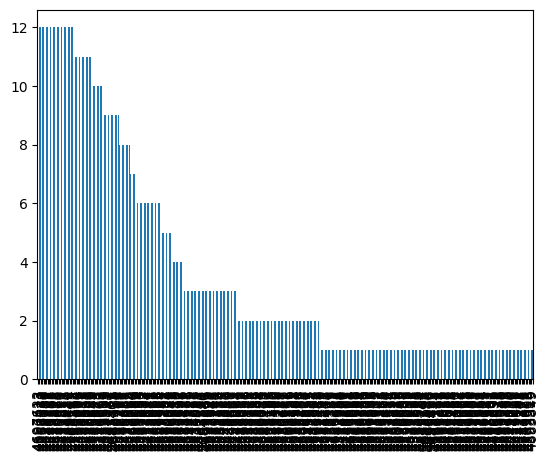

In [54]:
# Looking at how many games each qb played
fig, ax = plt.subplots()
qbr['athlete_id'].value_counts().plot(ax=ax, kind='bar')

In [55]:
# Create a subset of QBs who played 7 or game games in the season
v = qbr['athlete_id'].value_counts()
qbr_subset = qbr[qbr['athlete_id'].isin(v.index[v.gt(7)])]

In [56]:
qbr_subset.groupby(['athlete_name', 'school']).agg({'stat': 'mean'}).sort_values(by = 'stat', ascending = False)

,,stat
athlete_name,school,
Hendon Hooker,Tennessee,86.663636
Bo Nix,Oregon,85.350000
C.J. Stroud,Ohio State,83.758333
Jordan Travis,Florida State,83.590909
Caleb Williams,USC,82.408333
...,...,...
Phil Jurkovec,Boston College,35.737500
Spencer Petras,Iowa,35.708333
Brock Domann,Louisville,33.950000


In [57]:
# Subsetting to top 20 and adding in average points
top20_qbr = qbr_subset.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(20)
top20_qbr

,,points,stat
athlete_name,school,,
Hendon Hooker,Tennessee,46.545455,86.663636
Bo Nix,Oregon,39.666667,85.350000
C.J. Stroud,Ohio State,44.500000,83.758333
Jordan Travis,Florida State,37.272727,83.590909
Caleb Williams,USC,42.500000,82.408333
Drake Maye,North Carolina,37.083333,81.825000
Stetson Bennett,Georgia,38.363636,81.354545
Bryce Young,Alabama,42.272727,80.218182
Dorian Thompson-Robinson,UCLA,39.583333,79.866667


Text(0.5, 1.0, 'Average Points vs. Average QBR for Top 20 QBs')

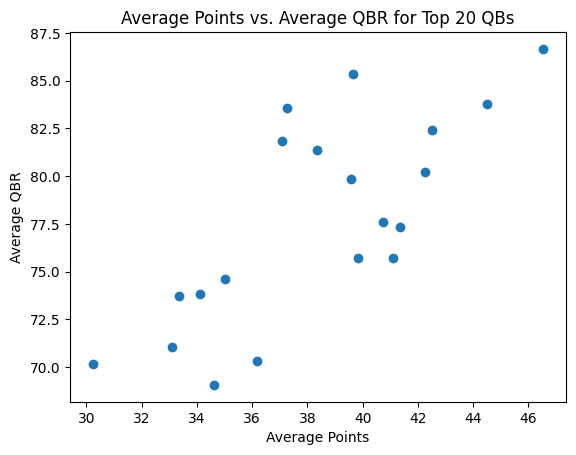

In [58]:
plt.scatter(top20_qbr['points'], top20_qbr['stat'])
plt.xlabel('Average Points')
plt.ylabel('Average QBR')
plt.title('Average Points vs. Average QBR for Top 20 QBs')

## Exploring Yards and Interceptions

In [65]:
intrcpt = passing_df[(passing_df['sub_category'] == 'INT')]
intrcpt.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
100,401442019,Tennessee,SEC,away,31,passing,INT,4360698,Joe Milton,0
214,401442019,Clemson,ACC,home,14,passing,INT,4426553,Davis Allen,0
215,401442019,Clemson,ACC,home,14,passing,INT,-5650,Team,0
216,401442019,Clemson,ACC,home,14,passing,INT,4685413,Cade Klubnik,2
386,401443542,Pittsburgh,ACC,away,37,passing,INT,-7111,Team,0


In [66]:
# Converting stat to float
intrcpt['stat'] = intrcpt['stat'].astype(float)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_60859/1059104045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrcpt['stat'] = intrcpt['stat'].astype(float)


In [67]:
# Create a subset of QBs who played 7 or game games in the season
v = intrcpt['athlete_id'].value_counts()
int_subset = intrcpt[intrcpt['athlete_id'].isin(v.index[v.gt(7)])]

In [68]:
# Aggregate statistics
int_subset.groupby(['athlete_name', 'school']).agg({'stat': 'sum'}).sort_values(by = 'stat', ascending = False)

,,stat
athlete_name,school,
Hunter Dekkers,Iowa State,14.0
Aidan O'Connell,Purdue,13.0
Jayden de Laura,Arizona,13.0
Brennan Armstrong,Virginia,12.0
Spencer Rattler,South Carolina,12.0
...,...,...
Hendon Hooker,Tennessee,2.0
AJ Swann,Vanderbilt,2.0
Adrian Martinez,Kansas State,1.0
